In [129]:
from bs4 import BeautifulSoup
import requests
import ipywidgets as widgets
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaganyesilova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [130]:
output_url = widgets.Text()
input_url = widgets.Text()

def cre_var(sender):
    output_url.value = input_url.value

input_url.on_submit(cre_var)

output_url_1 = widgets.Text()
input_url_1 = widgets.Text()

def cre_var_1(sender):
    output_url_1.value = input_url_1.value

input_url_1.on_submit(cre_var_1)

In [131]:
def find_news():
    
    response = requests.get(output_url.value, timeout=10)
    url_content = BeautifulSoup(response.content, 'html.parser')
    
    return url_content

def find_KD():
    
    response = requests.get(output_url_1.value, timeout=10)
    url_content_1 = BeautifulSoup(response.content, 'html.parser')
    
    return url_content_1



In [132]:
def make_news_list(html):

    news_divs = html.find_all('div', attrs={'class':"item"})

    news_heads = []

    for i in range(len(news_divs)):
    
        news_heads.append(news_divs[i].a.get_text())
    
    
    df_n = pd.DataFrame(news_heads)

    df_n.columns = ['news']
    
    return df_n

def make_KD_list(html):

    news_divs = html.find_all('div', attrs={'class':"item"})

    news_heads = []

    for i in range(len(news_divs)):
    
        news_heads.append(news_divs[i].h4.get_text())
    
    
    df_k = pd.DataFrame(news_heads)

    df_k.columns = ['news']
    

    return df_k


In [133]:
def cal_score(df_news):
    scores = []
    vader = SentimentIntensityAnalyzer()
    for head in (df_news['news']):
        score = vader.polarity_scores(head)
        scores.append(score)
    df_scr = pd.DataFrame(scores)
    return df_scr



In [134]:
def merg_df():
    return df_news.join(df_scr)




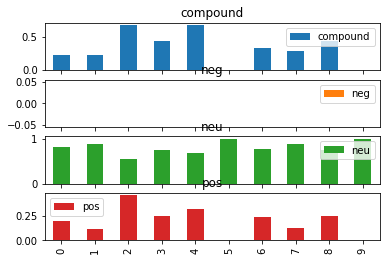

In [135]:

df.plot.bar(subplots=True)

plt.show()

In [140]:
#out = widgets.Output(layout={'border': '1px solid black'})

button_url_1 = widgets.Button(
    description = 'Get News',
    disabled = False,
    button_style = 'info',
    tooltip = 'Click to Preview',
    icon = 'search'
)

button_url_2 = widgets.Button(
    description = 'Get Key Dev.',
    disabled = False,
    button_style = 'info',
    tooltip = 'Click to Preview',
    icon = 'search'
)

button_upload = widgets.Button(
    description = 'Upload',
    disabled = False,
    button_style = 'warning',
    tooltip = 'Click to Upload',
    icon = 'check'
)

button_upload

    
def preview_clicked_1(b):
    out = widgets.Output(layout={'border': '1px solid black'})
    
    df_n = make_news_list(find_news())
    
    with out:
        out.clear_output()
        print('İşte Haberler: ')
        print(df_n['news'])
    
    #df_n = make_news_list(find_news())
    #print(df_n['news'])

def preview_clicked_2(b):
    df_k = make_KD_list(find_KD())
    print(df_k['news'])
    
button_url_1.on_click(preview_clicked_1)
    
button_url_2.on_click(preview_clicked_2)

In [141]:
tab1 = widgets.Tab()
placeholder = widgets.Label()

tab1.children = [input_url, button_url_1, placeholder]

tab1.set_title(0, 'Url')
tab1.set_title(1, 'News')
tab1.set_title(2, 'Result')



In [142]:
tab2 = widgets.Tab()
placeholder = widgets.Label()

tab2.children = [input_url_1, button_url_2, placeholder]

tab2.set_title(0, 'Url')
tab2.set_title(1, 'Key Dev.')
tab2.set_title(2, 'Result')



In [143]:
accordion = widgets.Accordion()

accordion.children = (
    tab1,
    tab2
)

accordion.set_title(0, 'For News')
accordion.set_title(1, 'For Key Developments')

accordion

Accordion(children=(Tab(children=(Text(value='https://www.reuters.com/companies/ASELS.IS/news'), Button(button…